## Multi-class categorical classification algorithms:
- Linear regression (with regularization)
- Random forest classifier
- SVM classifier (linear kernel enables feature importance ranking)
- Gradient boost (XGboost)
- Multinomial logistic regression
- LDA (which is a specific case of CCA, canonical correlation analysis)
- Naive Bayes (GaussianNB class)


- KNN 
    - Considering skipping KNN because p >> n

## Compare results from using all samples as training data, to only Fasted, to only Random

### Framework for rapid testing from https://machinelearningmastery.com/spot-check-machine-learning-algorithms-in-python/

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# from sklearn.decomposition import LatentDirichletAllocation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cross_decomposition import CCA

In [35]:
# def models()

# Make dictionary of models 
def define_models(models=dict()):
    models = {
        'log': LogisticRegression(),
        'en': ElasticNet(),
        'lr': LinearRegression(),
        'gb': GradientBoostingClassifier(),
        'rf': RandomForestClassifier(),
        'ada': AdaBoostClassifier(),
        'nb': GaussianNB(),
        'svml': SVC(kernel='linear'),
        'svmp': SVC(kernel='poly'),
        'svmr': SVC(kernel='rbf'),
        'lda': LinearDiscriminantAnalysis(),
    }
    return models

In [29]:
def load_dataset():
    return make_classification(n_samples=60, n_features=1000,
                               n_informative=500, 
                               n_classes=3, weights=[0.2, 0.5, 0.3],  # 3 classes, 12/30/18 just like N/I/D
                               random_state=1)
td = load_dataset()

In [31]:
def make_pipeline(model):
    steps = []
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
#     steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

def evaluate_model(X, y, model, folds, metric):
    # create the pipeline
    pipeline = make_pipeline(model)
    # evaluate model
    scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
    return scores

def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores

def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results

def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)

In [33]:
models

{'log': LogisticRegression(),
 'en': ElasticNet(),
 'lr': LinearRegression(),
 'gb': GradientBoostingClassifier(),
 'rf': RandomForestClassifier(),
 'ada': AdaBoostClassifier(),
 'nb': GaussianNB(),
 'svml': SVC(kernel='linear'),
 'svmp': SVC(kernel='poly'),
 'svmr': SVC(),
 'lda': LinearDiscriminantAnalysis()}

In [38]:
y

array([1, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 1,
       1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2])

In [36]:
# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

>log: error
>en: error
>lr: error
>gb: error
>rf: error
>ada: error
>nb: error
>svml: error
>svmp: error
>svmr: error
>lda: error
no results


Defined 53 models
>logistic: 0.533 (+/-0.067)
>ridge-0.1: 0.600 (+/-0.111)
>ridge-0.2: 0.600 (+/-0.111)
>ridge-0.3: 0.600 (+/-0.111)
>ridge-0.4: 0.600 (+/-0.111)
>ridge-0.5: 0.600 (+/-0.111)
>ridge-0.6: 0.600 (+/-0.111)
>ridge-0.7: 0.600 (+/-0.111)
>ridge-0.8: 0.600 (+/-0.111)
>ridge-0.9: 0.600 (+/-0.111)
>ridge-1.0: 0.600 (+/-0.111)
>sgd: 0.483 (+/-0.174)
>pa: 0.600 (+/-0.111)
>knn-1: 0.400 (+/-0.170)
>knn-2: 0.317 (+/-0.090)
>knn-3: 0.367 (+/-0.221)
>knn-4: 0.500 (+/-0.183)
>knn-5: 0.583 (+/-0.171)
>knn-6: 0.517 (+/-0.217)
>knn-7: 0.533 (+/-0.100)
>knn-8: 0.533 (+/-0.145)
>knn-9: 0.533 (+/-0.145)
>knn-10: 0.483 (+/-0.138)
>knn-11: 0.483 (+/-0.157)
>knn-12: 0.500 (+/-0.167)
>knn-13: 0.500 (+/-0.149)
>knn-14: 0.550 (+/-0.150)
>knn-15: 0.550 (+/-0.150)
>knn-16: 0.583 (+/-0.154)
>knn-17: 0.567 (+/-0.082)
>knn-18: 0.550 (+/-0.076)
>knn-19: 0.550 (+/-0.076)
>knn-20: 0.533 (+/-0.100)
>cart: 0.383 (+/-0.183)
>extra: 0.333 (+/-0.167)
>svml: 0.550 (+/-0.076)
>svmp: 0.533 (+/-0.067)
>svmr0.1: 0

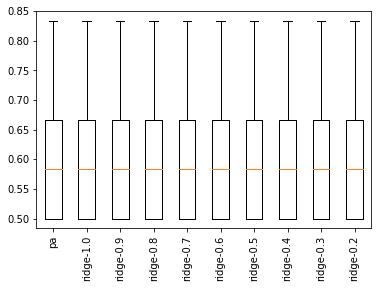

In [43]:
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
 
# load the dataset, returns X and y elements
def load_dataset():
    return make_classification(n_samples=60, n_features=1700,
                               n_informative=500, 
                               n_classes=3, 
#                                weights=[0.2, 0.8],    
                               weights=[0.2, 0.5, 0.3],  # 3 classes, 12/30/18 just like N/I/D
                               random_state=1)
 
# create a dict of standard models to evaluate {name:object}
def define_models(models=dict()):
	# linear models
	models['logistic'] = LogisticRegression()
	alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['ridge-'+str(a)] = RidgeClassifier(alpha=a)
	models['sgd'] = SGDClassifier(max_iter=1000, tol=1e-3)
	models['pa'] = PassiveAggressiveClassifier(max_iter=1000, tol=1e-3)
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsClassifier(n_neighbors=k)
	models['cart'] = DecisionTreeClassifier()
	models['extra'] = ExtraTreeClassifier()
	models['svml'] = SVC(kernel='linear')
	models['svmp'] = SVC(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVC(C=c)
	models['bayes'] = GaussianNB()
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostClassifier(n_estimators=n_trees)
	models['bag'] = BaggingClassifier(n_estimators=n_trees)
	models['rf'] = RandomForestClassifier(n_estimators=n_trees)
	models['et'] = ExtraTreesClassifier(n_estimators=n_trees)
	models['gbm'] = GradientBoostingClassifier(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models
 
# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores
 
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')
 
# load dataset
X, y = load_dataset()
# get model list
models = define_models()
# evaluate models
results = evaluate_models(X, y, models)
# summarize results
summarize_results(results)

Defined 190 models
>lr: -1714356.525 (+/-1024803.975)
>lasso-0.0: -4590395.727 (+/-2195244.207)
>lasso-0.1: -2264014.359 (+/-1149547.044)
>lasso-0.2: -2179615.047 (+/-1119172.240)
>lasso-0.3: -2263729.719 (+/-1184122.320)
>lasso-0.4: -2324565.402 (+/-1192319.321)
>lasso-0.5: -2331330.656 (+/-1193433.367)
>lasso-0.6: -2329644.874 (+/-1188144.098)
>lasso-0.7: -2337243.967 (+/-1177114.183)
>lasso-0.8: -2333513.754 (+/-1155258.964)
>lasso-0.9: -2327843.638 (+/-1132788.805)
>lasso-1.0: -2317112.041 (+/-1111295.499)
>ridge-0.0: -1716600.106 (+/-1024866.478)
>ridge-0.1: -1716598.853 (+/-1024899.677)
>ridge-0.2: -1716597.639 (+/-1024932.791)
>ridge-0.3: -1716596.465 (+/-1024965.819)
>ridge-0.4: -1716595.330 (+/-1024998.763)
>ridge-0.5: -1716594.233 (+/-1025031.623)
>ridge-0.6: -1716593.174 (+/-1025064.399)
>ridge-0.7: -1716592.154 (+/-1025097.092)
>ridge-0.8: -1716591.170 (+/-1025129.701)
>ridge-0.9: -1716590.224 (+/-1025162.227)
>ridge-1.0: -1716589.315 (+/-1025194.671)
>en-0.0-0.0: -4590395.

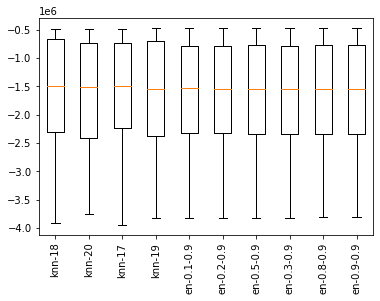

In [47]:
import warnings
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
 
# load the dataset, returns X and y elements
def load_dataset():
	return make_regression(n_samples=60, 
                           n_features=1700, n_informative=500,
                           noise=0.1, 
                           random_state=1)
 
# create a dict of standard models to evaluate {name:object}
def get_models(models=dict()):
	# linear models
	models['lr'] = LinearRegression()
	alpha = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for a in alpha:
		models['lasso-'+str(a)] = Lasso(alpha=a)
	for a in alpha:
		models['ridge-'+str(a)] = Ridge(alpha=a)
	for a1 in alpha:
		for a2 in alpha:
			name = 'en-' + str(a1) + '-' + str(a2)
			models[name] = ElasticNet(alpha=a1, l1_ratio=a2)
	models['huber'] = HuberRegressor()
	models['lars'] = Lars()
	models['llars'] = LassoLars()
	models['pa'] = PassiveAggressiveRegressor(max_iter=1000, tol=1e-3)
	models['ranscac'] = RANSACRegressor()
	models['sgd'] = SGDRegressor(max_iter=1000, tol=1e-3)
	models['theil'] = TheilSenRegressor()
	# non-linear models
	n_neighbors = range(1, 21)
	for k in n_neighbors:
		models['knn-'+str(k)] = KNeighborsRegressor(n_neighbors=k)
	models['cart'] = DecisionTreeRegressor()
	models['extra'] = ExtraTreeRegressor()
	models['svml'] = SVR(kernel='linear')
	models['svmp'] = SVR(kernel='poly')
	c_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
	for c in c_values:
		models['svmr'+str(c)] = SVR(C=c)
	# ensemble models
	n_trees = 100
	models['ada'] = AdaBoostRegressor(n_estimators=n_trees)
	models['bag'] = BaggingRegressor(n_estimators=n_trees)
	models['rf'] = RandomForestRegressor(n_estimators=n_trees)
	models['et'] = ExtraTreesRegressor(n_estimators=n_trees)
	models['gbm'] = GradientBoostingRegressor(n_estimators=n_trees)
	print('Defined %d models' % len(models))
	return models
 
# create a feature preparation pipeline for a model
def make_pipeline(model):
	steps = list()
	# standardization
	steps.append(('standardize', StandardScaler()))
	# normalization
	steps.append(('normalize', MinMaxScaler()))
	# the model
	steps.append(('model', model))
	# create pipeline
	pipeline = Pipeline(steps=steps)
	return pipeline
 
# evaluate a single model
def evaluate_model(X, y, model, folds, metric):
	# create the pipeline
	pipeline = make_pipeline(model)
	# evaluate model
	scores = cross_val_score(pipeline, X, y, scoring=metric, cv=folds, n_jobs=-1)
	return scores
 
# evaluate a model and try to trap errors and and hide warnings
def robust_evaluate_model(X, y, model, folds, metric):
	scores = None
	try:
		with warnings.catch_warnings():
			warnings.filterwarnings("ignore")
			scores = evaluate_model(X, y, model, folds, metric)
	except:
		scores = None
	return scores
 
# evaluate a dict of models {name:object}, returns {name:score}
def evaluate_models(X, y, models, folds=10, metric='accuracy'):
	results = dict()
	for name, model in models.items():
		# evaluate the model
		scores = robust_evaluate_model(X, y, model, folds, metric)
		# show process
		if scores is not None:
			# store a result
			results[name] = scores
			mean_score, std_score = mean(scores), std(scores)
			print('>%s: %.3f (+/-%.3f)' % (name, mean_score, std_score))
		else:
			print('>%s: error' % name)
	return results
 
# print and plot the top n results
def summarize_results(results, maximize=True, top_n=10):
	# check for no results
	if len(results) == 0:
		print('no results')
		return
	# determine how many results to summarize
	n = min(top_n, len(results))
	# create a list of (name, mean(scores)) tuples
	mean_scores = [(k,mean(v)) for k,v in results.items()]
	# sort tuples by mean score
	mean_scores = sorted(mean_scores, key=lambda x: x[1])
	# reverse for descending order (e.g. for accuracy)
	if maximize:
		mean_scores = list(reversed(mean_scores))
	# retrieve the top n for summarization
	names = [x[0] for x in mean_scores[:n]]
	scores = [results[x[0]] for x in mean_scores[:n]]
	# print the top n
	print()
	for i in range(n):
		name = names[i]
		mean_score, std_score = mean(results[name]), std(results[name])
		print('Rank=%d, Name=%s, Score=%.3f (+/- %.3f)' % (i+1, name, mean_score, std_score))
	# boxplot for the top n
	pyplot.boxplot(scores, labels=names)
	_, labels = pyplot.xticks()
	pyplot.setp(labels, rotation=90)
	pyplot.savefig('spotcheck.png')
 
# load dataset
X, y = load_dataset()
# get model list
models = get_models()
# evaluate models
results = evaluate_models(X, y, models, folds=10, metric='neg_mean_squared_error')
# summarize results
summarize_results(results)